In [1]:
# Fixing inports
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import time

In [2]:
# Setting up class
class LinearRegression:
    def __init__(self):
        self.x = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)
        
        self.W = tf.Variable([[0.0]])
        self.b = tf.Variable([[0.0]])
        
        self.f = tf.matmul(self.x, self.W) + self.b
        
        self.loss = tf.reduce_mean(tf.square(self.f - self.y))

In [3]:
# Reading data
data = pd.read_csv('length_weight.csv')

x = np.mat(data.iloc[:, 0:1].values)
y = np.mat(data.iloc[:, 1:].values)

In [4]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=0)

In [5]:
# Creeating and training the model
model= LinearRegression()
mini_op = tf.train.GradientDescentOptimizer(0.0001).minimize(model.loss)

session = tf.Session()
session.run(tf.global_variables_initializer())
start = time.time()
for i in range(100000):
    session.run(mini_op, {model.x: x_train, model.y: y_train})
end = time.time()
W, b, loss = session.run([model.W, model.b, model.loss], {model.x: x_train, model.y: y_train})
print("W: %f\nb: %f\nLoss: %f" % (W, b, loss))
print("Time: %.2f" % (end - start))

W: 0.203745
b: -5.624616
Loss: 1.421267
Time: 33.25


<IPython.core.display.Javascript object>


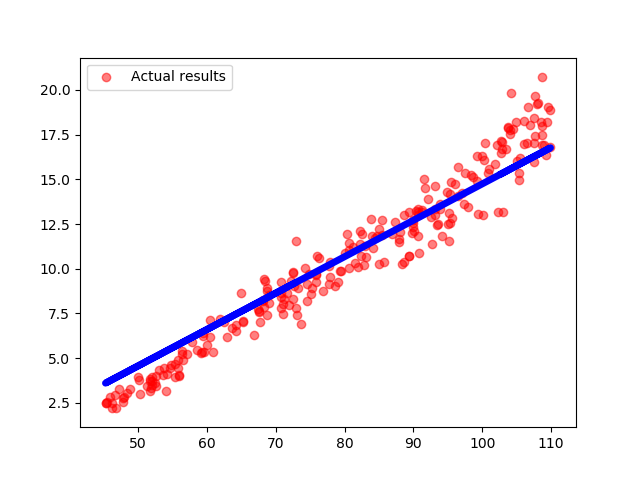

Loss: 1.42


In [12]:
# Predicting and comparing results
%matplotlib notebook
f = session.run(model.f, {model.x: x_test, model.y: y_test})

plt.plot(x_test, f, color='blue', linewidth=5.0)
plt.scatter([x[0] for x in x_test], [x[0] for x in y_test], c='red', label='Actual results', alpha=0.5)
plt.legend()
plt.show()
print("Loss: %.2f" % loss)

In [9]:
session.close()